In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime as dt
start = dt(2009,1,1)
end = dt(2022,5,1)

In [2]:
y = pd.read_html('https://www.clal.it/en/index.php?section=latte_cina')[9].iloc[2:14,0::2].iloc[:,:-2].to_numpy(dtype=float).T.flatten()
y = y[~np.isnan(y)]
y

array([262., 257., 249., 243., 237., 232., 232., 231., 236., 243., 252.,
       260., 268., 273., 274., 279., 282., 286., 289., 293., 298., 302.,
       307., 313., 318., 320., 320., 320., 319., 320., 319., 319., 320.,
       322., 323., 325., 326., 328., 328., 327., 327., 327., 327., 327.,
       328., 331., 334., 338., 340., 342., 342., 343., 345., 350., 355.,
       361., 370., 381., 398., 412., 423., 426., 423., 421., 416., 408.,
       400., 395., 392., 390., 384., 379., 356., 344., 342., 340., 340.,
       341., 341., 341., 344., 347., 350., 354., 356., 356., 354., 347.,
       346., 342., 340., 339., 344., 345., 347., 352., 354., 354., 353.,
       350., 345., 342., 341., 341., 346., 348., 350., 352., 350., 348.,
       347., 345., 342., 339., 337., 338., 345., 351., 355., 358., 361.,
       362., 359., 355., 353., 355., 359., 365., 371., 378., 383., 384.,
       384., 382., 376., 361., 356., 358., 361., 371., 384., 395., 402.,
       414., 423., 428., 429., 426., 423., 427., 43

In [3]:
Other_Commodities = pdr.get_data_fred(['MCOILBRENTEU', 'MCOILWTICO', 'MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM'], start, end)
Other_Commodities

,MCOILBRENTEU,MCOILWTICO,MHHNGSP,PBARLUSDM,PMAIZMTUSDM,PNGASEUUSDM,PSOYBUSDM,PWHEAMTUSDM
DATE,,,,,,,,
2009-01-01,43.44,41.71,5.24,121.605032,173.295130,16.02,364.717966,211.276083
2009-02-01,43.32,39.09,4.52,112.570224,163.399961,14.47,341.271618,195.224903
2009-03-01,46.54,47.94,3.96,114.938496,164.577030,11.47,333.657849,199.100568
2009-04-01,50.18,49.65,3.50,111.019715,168.795905,8.60,374.466420,200.887647
2009-05-01,57.30,59.03,3.83,129.385513,180.070212,8.60,422.355053,227.186091
...,...,...,...,...,...,...,...,...
2022-01-01,86.51,83.22,4.38,NaN,NaN,NaN,NaN,NaN
2022-02-01,97.13,91.64,4.69,NaN,NaN,NaN,NaN,NaN
2022-03-01,117.25,108.50,4.90,NaN,NaN,NaN,NaN,NaN


In [4]:
# initialize setup
from pycaret.regression import *
s = setup(Other_Commodities, target = y)

,Description,Value
0,Session id,7584
1,Target,target
2,Target type,Regression
3,Data shape,"(161, 9)"
4,Train data shape,"(112, 9)"
5,Test data shape,"(49, 9)"
6,Numeric features,8
7,Rows with missing values,3.7%
8,Preprocess,True
9,Imputation type,simple


In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16.5743,735.3381,23.9906,0.6682,0.0728,0.0508,0.0390
et,Extra Trees Regressor,15.9319,602.3539,23.4700,0.6505,0.0724,0.0488,0.0820
catboost,CatBoost Regressor,16.5847,649.0895,24.3568,0.6010,0.0747,0.0507,0.9380
xgboost,Extreme Gradient Boosting,18.9463,833.4141,27.0321,0.5505,0.0810,0.0574,0.1110
rf,Random Forest Regressor,21.2190,1010.0697,30.7740,0.4600,0.0931,0.0650,0.1000
ada,AdaBoost Regressor,17.3725,759.7371,25.2067,0.4063,0.0767,0.0524,0.0480
knn,K Neighbors Regressor,22.2762,1236.9167,33.3443,0.3431,0.1012,0.0686,0.0160
lightgbm,Light Gradient Boosting Machine,24.6957,1362.7108,34.9463,0.2917,0.1047,0.0751,0.0380
br,Bayesian Ridge,29.4431,1645.1129,39.2393,0.0958,0.1179,0.0892,0.0130
dt,Decision Tree Regressor,21.1121,1682.4530,36.6443,0.0254,0.1078,0.0640,0.0140


In [6]:
best.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 7584,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

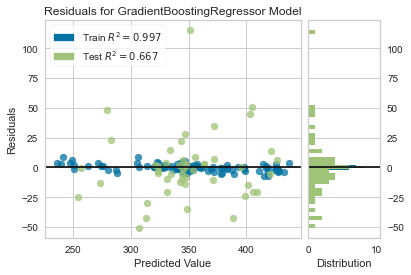

In [7]:
plot_model(best)

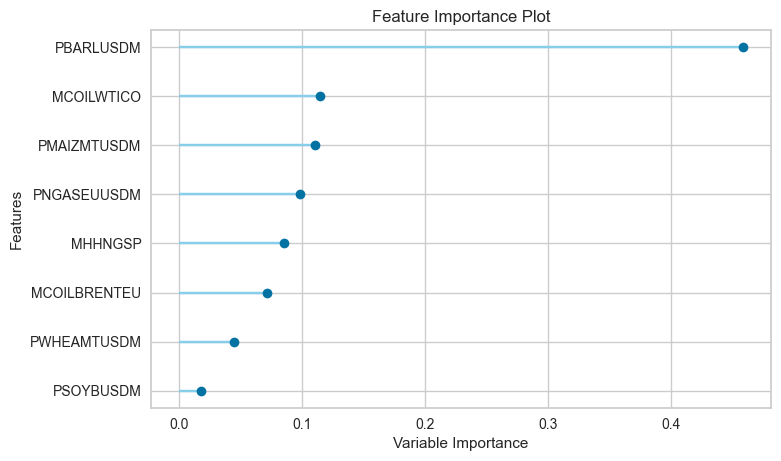

In [8]:
plot_model(best, plot='feature')

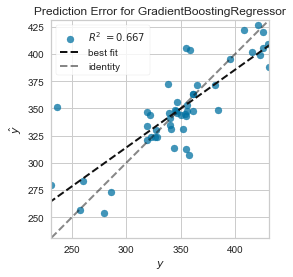

In [9]:
plot_model(best, plot='error')